In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.preprocessing import *

In [3]:
pose_csv = '../videos/video_1_simDLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(5324, 12)


### original data table

In [9]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               625.964661  324.992737   
3                                               631.432678  322.379242   
6                                               632.395081  329.907288   
9                                               628.113098  332.329926   
12                                              616.336182  336.912781   
15                                              611.677063  346.169281   
18                                              616.988098  350.767853   
21                                              614.836609  356.375580   
24                                              610.427002  360.691864   
27                                              604.685486  370.988464   
30                                              588.497375  376.274109   
33                                              578.584717  378.161438   
36                                              561.072937  400.196228   
39                                              544.806763  418.171387   
42                                              535.664368  426.610962   
45                                              533.695618  421.665833   
48                                              216.178650  680.343506   
51                                              526.930237  408.999329   
54                                              522.299133  408.102600   
57                                              529.111694  411.403198   
60                                              532.172424  410.893036   
63                                              533.211487  404.476807   
66                                              215.913406  679.094971   
69                                              215.524628  678.964355   
72                                              215.587799  679.867920   
75                                              216.707443  678.603333   
78                                              215.694595  678.105347   
81                                              557.061829  420.831360   
84                                              552.709961  442.267914   
87                                              553.755981  455.721436   
90                                              572.660706  466.709320   
93                                              579.294250  488.920227   
96                                              586.227295  508.881805   
99                                              593.999329  536.099426   
102                                             603.027405  557.946472   
105                                             615.998047  579.170288   
108                                             622.011597  587.136230   
111                                             621.280151  585.329407   
114                                             622.978027  583.632996   
117                                             623.786377  585.091919   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           1.000000    620.145325  281.320557   0.999934   601.669312   
3           1.000000    623.647156  277.044189   1.000000   601.144409   
6           1.000000    624.843262  280.853271   0.999999   602.124146   
9           1.000000    624.457275  280.941650   0.999999   601.765198   
12          1.000000    624.361877  309.134735   0.999998   601.092346   
15          1.000000    621.740234  307.951111   0.999980   600.046631   
18          0.999998    625.255371  311.809052   0.999997   604.840210   
21          1.000000    624.759583  312.306824   0.999998   605.295776   
24 

### after removing likelihood and headers

In [5]:
pose[:5, :]

array([[625.96466064, 324.99273682, 620.14532471, 281.32055664,
        601.66931152, 298.22988892, 611.66741943, 249.08453369,
        564.29669189, 260.65786743, 562.86425781, 232.2522583 ],
       [628.69213867, 321.59823608, 622.71929932, 277.25991821,
        601.42541504, 297.15686035, 612.91363525, 250.34954834,
        564.69219971, 261.13150024, 564.07562256, 232.22421265],
       [631.30926514, 318.86428833, 623.4934082 , 277.10919189,
        600.86254883, 298.00683594, 613.15515137, 250.89717102,
        564.48071289, 261.17861938, 565.74237061, 233.04277039],
       [631.43267822, 322.37924194, 623.64715576, 277.04418945,
        601.14440918, 297.68139648, 613.3170166 , 250.86219788,
        565.73754883, 262.55929565, 566.26861572, 234.7775116 ],
       [633.46502686, 324.75631714, 624.52209473, 278.0395813 ,
        601.0604248 , 296.81643677, 613.39886475, 250.7353363 ,
        565.99932861, 263.32849121, 566.3637085 , 235.89526367]])

### plot

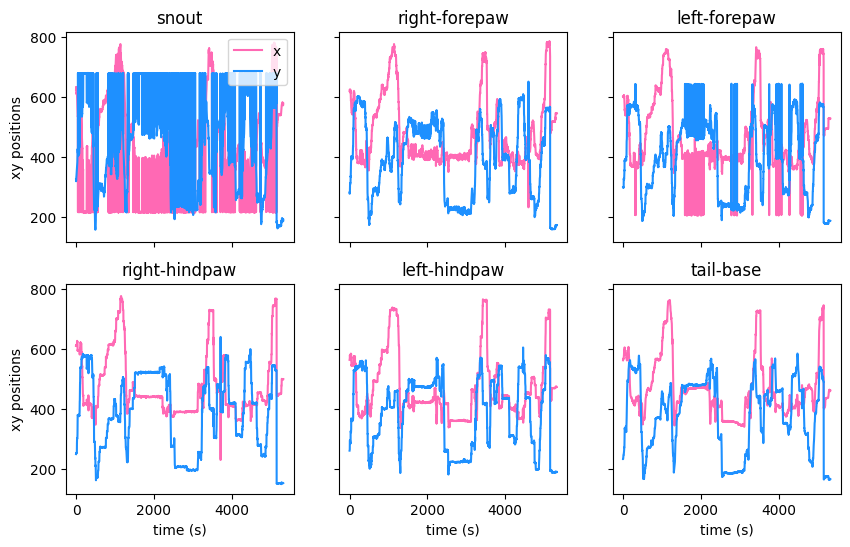

In [6]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [7]:
np.save('../processed_data/pose_sim.npy', pose)